# Neural Networks Design

In [1]:
%matplotlib inline

In [2]:
import itertools
import matplotlib.pyplot as plt
import h5py
import numpy as np
import sklearn.preprocessing
import sklearn.metrics
import imblearn.over_sampling
import spectraldl.plot as plot
import spectraldl.preprocessing as preprocessing
import tensorflow.contrib.keras as keras

In [3]:
with h5py.File('data/data.hdf5') as f:
    X_tr_ = f['X_tr'][...]
    y_tr_ = f['y_tr'][...]
    X_val = f['X_val'][...]
    y_val = f['y_val'][...]
    X_te = f['X_te'][...]
    y_te = f['y_te'][...]

In [4]:
def plot_hist(hist):
    fig, (ax1, ax2) = plt.subplots(2, 1)
    ax1.plot(hist.epoch, hist.history['acc'], label='training data')
    ax1.plot(hist.epoch, hist.history['val_acc'], label='validation data')
    ax1.set_xlabel('epoch')
    ax1.set_ylabel('accuracy')
    ax1.legend()
    ax2.plot(hist.epoch, hist.history['loss'])
    ax2.set_xlabel('epoch')
    ax2.set_ylabel('loss')
    ax1.grid()
    ax2.grid()
    fig.tight_layout()

def plot_cm(model, X, y):
    y_out = model.predict_classes(X, verbose=0)
    cm = sklearn.metrics.confusion_matrix(y, y_out)
    classes = ['emission', 'absorption', 'double-peak']
    plot.plot_confusion_matrix(cm, classes, normalize=True)

def plot_confusion_matrix(
        cm, classes, ax,
        normalize=False, title='confusion matrix', cmap=plt.cm.Greys
    ):
    '''
    This function plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    '''
    if normalize:
        cm = cm.astype(np.float) / cm.sum(axis=1)[:, np.newaxis]

    ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title)
    #ax.colorbar()
    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_xticklabels(classes, rotation=45)
    ax.set_yticks(tick_marks)
    ax.set_yticklabels(classes)

    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, round(cm[i, j], 2),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')

    ax.set_ylabel('true label')
    ax.set_xlabel('predicted label')

classes = ['emission', 'absorption', 'double-peak']

In [5]:
X_val = preprocessing.scale_samples(X_val)
X_te = preprocessing.scale_samples(X_te)

y_val_oh = keras.utils.to_categorical(y_val, num_classes=3)
y_te_oh = keras.utils.to_categorical(y_te, num_classes=3)

## Deep Neural Net

In [6]:
# variables ending with _ (underscore) hold original data
X_tr, y_tr = np.copy(X_tr_), np.copy(y_tr_)

# preprocessing
X_tr = preprocessing.scale_samples(X_tr)
#X_tr, y_tr = preprocessing.smote_over_sample(X_tr, y_tr, n_classes=3)

# oh stands fo one hot vector
y_tr_oh = keras.utils.to_categorical(y_tr, num_classes=3)

dnn_model = keras.models.Sequential()

units = 512

dnn_model.add(keras.layers.Dense(units=units, activation='relu', input_shape=(140, )))
dnn_model.add(keras.layers.Dropout(0.5))

dnn_model.add(keras.layers.Dense(units=units, activation='relu'))
dnn_model.add(keras.layers.Dropout(0.5))

dnn_model.add(keras.layers.Dense(units=units, activation='relu'))
dnn_model.add(keras.layers.Dropout(0.5))

dnn_model.add(keras.layers.Dense(units=units, activation='relu'))
dnn_model.add(keras.layers.Dropout(0.5))

dnn_model.add(keras.layers.Dense(units=units, activation='relu'))
dnn_model.add(keras.layers.Dropout(0.5))
    
dnn_model.add(keras.layers.Dense(units=3, activation='softmax'))

dnn_model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)

# train the model
dnn_hist = dnn_model.fit(
    X_tr, y_tr_oh,
    epochs=250, batch_size=256, verbose=2,
    validation_data=(X_val, y_val_oh)
)

Train on 9314 samples, validate on 2329 samples
Epoch 1/250
1s - loss: 0.4451 - acc: 0.8357 - val_loss: 0.2028 - val_acc: 0.9261
Epoch 2/250
0s - loss: 0.1771 - acc: 0.9420 - val_loss: 0.1126 - val_acc: 0.9596
Epoch 3/250
0s - loss: 0.1426 - acc: 0.9521 - val_loss: 0.1012 - val_acc: 0.9648
Epoch 4/250
0s - loss: 0.1174 - acc: 0.9612 - val_loss: 0.1037 - val_acc: 0.9631
Epoch 5/250
0s - loss: 0.1086 - acc: 0.9601 - val_loss: 0.1049 - val_acc: 0.9665
Epoch 6/250
0s - loss: 0.1068 - acc: 0.9631 - val_loss: 0.0968 - val_acc: 0.9639
Epoch 7/250
0s - loss: 0.0990 - acc: 0.9664 - val_loss: 0.0980 - val_acc: 0.9618
Epoch 8/250
0s - loss: 0.0953 - acc: 0.9686 - val_loss: 0.0948 - val_acc: 0.9678
Epoch 9/250
0s - loss: 0.0994 - acc: 0.9653 - val_loss: 0.1077 - val_acc: 0.9648
Epoch 10/250
0s - loss: 0.0980 - acc: 0.9658 - val_loss: 0.0997 - val_acc: 0.9626
Epoch 11/250
0s - loss: 0.0937 - acc: 0.9688 - val_loss: 0.0989 - val_acc: 0.9691
Epoch 12/250
0s - loss: 0.0898 - acc: 0.9699 - val_loss: 0.

0s - loss: 0.0561 - acc: 0.9786 - val_loss: 0.0857 - val_acc: 0.9768
Epoch 102/250
0s - loss: 0.0520 - acc: 0.9807 - val_loss: 0.0881 - val_acc: 0.9751
Epoch 103/250
0s - loss: 0.0543 - acc: 0.9805 - val_loss: 0.0941 - val_acc: 0.9751
Epoch 104/250
0s - loss: 0.0506 - acc: 0.9797 - val_loss: 0.0852 - val_acc: 0.9742
Epoch 105/250
0s - loss: 0.0556 - acc: 0.9787 - val_loss: 0.0956 - val_acc: 0.9712
Epoch 106/250
0s - loss: 0.0507 - acc: 0.9805 - val_loss: 0.0918 - val_acc: 0.9695
Epoch 107/250
0s - loss: 0.0541 - acc: 0.9798 - val_loss: 0.0882 - val_acc: 0.9729
Epoch 108/250
0s - loss: 0.0534 - acc: 0.9806 - val_loss: 0.0854 - val_acc: 0.9721
Epoch 109/250
0s - loss: 0.0542 - acc: 0.9804 - val_loss: 0.0932 - val_acc: 0.9721
Epoch 110/250
0s - loss: 0.0481 - acc: 0.9812 - val_loss: 0.1080 - val_acc: 0.9738
Epoch 111/250
0s - loss: 0.0553 - acc: 0.9783 - val_loss: 0.0906 - val_acc: 0.9772
Epoch 112/250
0s - loss: 0.0540 - acc: 0.9809 - val_loss: 0.0909 - val_acc: 0.9742
Epoch 113/250
0s -

0s - loss: 0.0514 - acc: 0.9820 - val_loss: 0.0967 - val_acc: 0.9708
Epoch 201/250
0s - loss: 0.0438 - acc: 0.9837 - val_loss: 0.0918 - val_acc: 0.9781
Epoch 202/250
0s - loss: 0.0473 - acc: 0.9839 - val_loss: 0.0996 - val_acc: 0.9760
Epoch 203/250
0s - loss: 0.0431 - acc: 0.9858 - val_loss: 0.0943 - val_acc: 0.9760
Epoch 204/250
0s - loss: 0.0474 - acc: 0.9820 - val_loss: 0.0906 - val_acc: 0.9751
Epoch 205/250
0s - loss: 0.0469 - acc: 0.9824 - val_loss: 0.0991 - val_acc: 0.9725
Epoch 206/250
0s - loss: 0.0415 - acc: 0.9850 - val_loss: 0.1042 - val_acc: 0.9734
Epoch 207/250
0s - loss: 0.0444 - acc: 0.9834 - val_loss: 0.1007 - val_acc: 0.9747
Epoch 208/250
0s - loss: 0.0467 - acc: 0.9813 - val_loss: 0.0922 - val_acc: 0.9734
Epoch 209/250
0s - loss: 0.0436 - acc: 0.9837 - val_loss: 0.1004 - val_acc: 0.9755
Epoch 210/250
0s - loss: 0.0456 - acc: 0.9840 - val_loss: 0.1056 - val_acc: 0.9781
Epoch 211/250
0s - loss: 0.0418 - acc: 0.9838 - val_loss: 0.1185 - val_acc: 0.9708
Epoch 212/250
0s -

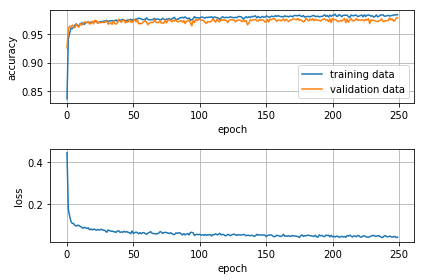

In [7]:
plot_hist(dnn_hist)

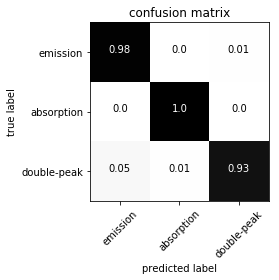

In [8]:
fig, ax = plt.subplots(figsize=(4, 4))
tmp_out = dnn_model.predict_classes(X_te, verbose=0)
tmp_cm = sklearn.metrics.confusion_matrix(y_te, tmp_out)
plot_confusion_matrix(tmp_cm, classes, ax, normalize=True)
fig.tight_layout()

## ConvNet

In [9]:
# variables ending with _ (underscore) hold original data
X_tr, y_tr = np.copy(X_tr_), np.copy(y_tr_)

# preprocessing
X_tr = preprocessing.scale_samples(X_tr)
X_tr, y_tr = preprocessing.smote_over_sample(X_tr, y_tr, n_classes=3)

# oh stands fo one hot vector
y_tr_oh = keras.utils.to_categorical(y_tr, num_classes=3)

HEIGHT = 1
WIDTH = 140
DEPTH = 1
X_tr = X_tr.reshape(-1, HEIGHT, WIDTH, DEPTH)
X_val = X_val.reshape(-1, HEIGHT, WIDTH, DEPTH)

input_shape = X_tr.shape[1:]

conv_model = keras.models.Sequential([
    keras.layers.Conv2D(64, (1, 3), activation='relu', input_shape=input_shape),
    keras.layers.Conv2D(64, (1, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(1, 2)),

    keras.layers.Conv2D(128, (1, 3), activation='relu'),
    keras.layers.Conv2D(128, (1, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(1, 2)),

    keras.layers.Conv2D(256, (1, 3), activation='relu'),
    keras.layers.Conv2D(256, (1, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(1, 2)),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(3, activation='softmax')
])

conv_model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# training
conv_hist = conv_model.fit(
    X_tr, y_tr_oh,
    epochs=250, batch_size=256, verbose=2,
    validation_data=(X_val, y_val_oh)
)

/usr/local/lib/python3.5/dist-packages/imblearn/base.py:306: UserWarning: The target type should be binary.
  warnings.warn('The target type should be binary.')
/usr/local/lib/python3.5/dist-packages/imblearn/base.py:306: UserWarning: The target type should be binary.
  warnings.warn('The target type should be binary.')


Train on 13179 samples, validate on 2329 samples
Epoch 1/250
3s - loss: 0.3670 - acc: 0.8448 - val_loss: 0.1150 - val_acc: 0.9609
Epoch 2/250
1s - loss: 0.1081 - acc: 0.9649 - val_loss: 0.0863 - val_acc: 0.9678
Epoch 3/250
1s - loss: 0.0813 - acc: 0.9709 - val_loss: 0.1146 - val_acc: 0.9579
Epoch 4/250
1s - loss: 0.0760 - acc: 0.9740 - val_loss: 0.0752 - val_acc: 0.9725
Epoch 5/250
1s - loss: 0.0591 - acc: 0.9795 - val_loss: 0.0628 - val_acc: 0.9790
Epoch 6/250
1s - loss: 0.0538 - acc: 0.9805 - val_loss: 0.0727 - val_acc: 0.9738
Epoch 7/250
1s - loss: 0.0523 - acc: 0.9813 - val_loss: 0.0633 - val_acc: 0.9751
Epoch 8/250
1s - loss: 0.0464 - acc: 0.9843 - val_loss: 0.0703 - val_acc: 0.9772
Epoch 9/250
1s - loss: 0.0466 - acc: 0.9838 - val_loss: 0.0699 - val_acc: 0.9764
Epoch 10/250
1s - loss: 0.0396 - acc: 0.9870 - val_loss: 0.0838 - val_acc: 0.9777
Epoch 11/250
1s - loss: 0.0398 - acc: 0.9859 - val_loss: 0.0678 - val_acc: 0.9785
Epoch 12/250
1s - loss: 0.0373 - acc: 0.9869 - val_loss: 0

1s - loss: 0.0069 - acc: 0.9980 - val_loss: 0.2000 - val_acc: 0.9760
Epoch 102/250
1s - loss: 0.0071 - acc: 0.9976 - val_loss: 0.1586 - val_acc: 0.9777
Epoch 103/250
1s - loss: 0.0040 - acc: 0.9985 - val_loss: 0.2026 - val_acc: 0.9755
Epoch 104/250
1s - loss: 0.0036 - acc: 0.9988 - val_loss: 0.1911 - val_acc: 0.9768
Epoch 105/250
1s - loss: 0.0051 - acc: 0.9985 - val_loss: 0.1827 - val_acc: 0.9704
Epoch 106/250
1s - loss: 0.0054 - acc: 0.9983 - val_loss: 0.1760 - val_acc: 0.9712
Epoch 107/250
1s - loss: 0.0056 - acc: 0.9984 - val_loss: 0.1649 - val_acc: 0.9760
Epoch 108/250
1s - loss: 0.0067 - acc: 0.9977 - val_loss: 0.1609 - val_acc: 0.9798
Epoch 109/250
1s - loss: 0.0117 - acc: 0.9968 - val_loss: 0.1494 - val_acc: 0.9755
Epoch 110/250
1s - loss: 0.0042 - acc: 0.9990 - val_loss: 0.1673 - val_acc: 0.9764
Epoch 111/250
1s - loss: 0.0030 - acc: 0.9989 - val_loss: 0.1896 - val_acc: 0.9768
Epoch 112/250
1s - loss: 0.0042 - acc: 0.9989 - val_loss: 0.1805 - val_acc: 0.9768
Epoch 113/250
1s -

1s - loss: 3.7898e-04 - acc: 0.9998 - val_loss: 0.2309 - val_acc: 0.9785
Epoch 201/250
1s - loss: 2.2343e-04 - acc: 1.0000 - val_loss: 0.2458 - val_acc: 0.9785
Epoch 202/250
1s - loss: 3.2917e-04 - acc: 0.9998 - val_loss: 0.2453 - val_acc: 0.9790
Epoch 203/250
1s - loss: 0.0086 - acc: 0.9976 - val_loss: 0.1933 - val_acc: 0.9738
Epoch 204/250
1s - loss: 0.0075 - acc: 0.9976 - val_loss: 0.2064 - val_acc: 0.9760
Epoch 205/250
1s - loss: 0.0115 - acc: 0.9963 - val_loss: 0.2257 - val_acc: 0.9734
Epoch 206/250
1s - loss: 0.0082 - acc: 0.9979 - val_loss: 0.2090 - val_acc: 0.9708
Epoch 207/250
1s - loss: 0.0122 - acc: 0.9975 - val_loss: 0.1904 - val_acc: 0.9747
Epoch 208/250
1s - loss: 0.0060 - acc: 0.9983 - val_loss: 0.1965 - val_acc: 0.9717
Epoch 209/250
1s - loss: 0.0036 - acc: 0.9989 - val_loss: 0.1940 - val_acc: 0.9785
Epoch 210/250
1s - loss: 0.0020 - acc: 0.9992 - val_loss: 0.2259 - val_acc: 0.9721
Epoch 211/250
1s - loss: 0.0019 - acc: 0.9995 - val_loss: 0.2159 - val_acc: 0.9747
Epoch 

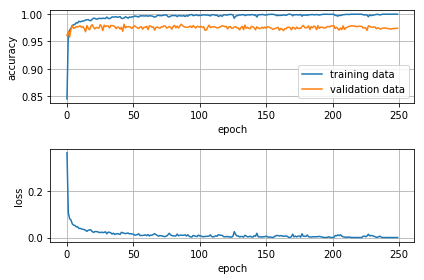

In [10]:
# vizualize traing resutls
plot_hist(conv_hist)

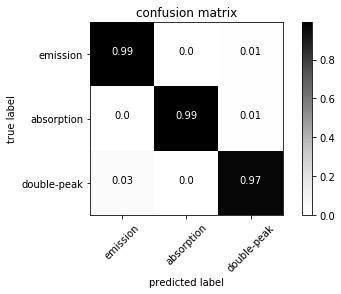

In [11]:
plot_cm(conv_model, X_te.reshape(-1, HEIGHT, WIDTH, DEPTH), y_te)

In [12]:
dnn_out = dnn_model.predict_classes(X_te, verbose=0)
dnn_cm = sklearn.metrics.confusion_matrix(y_te, dnn_out)

conv_out = conv_model.predict_classes(X_te.reshape(-1, HEIGHT, WIDTH, DEPTH), verbose=0)
conv_cm = sklearn.metrics.confusion_matrix(y_te, conv_out)

In [13]:
np.count_nonzero(y_te == dnn_out), np.count_nonzero(y_te == conv_out)

(1273, 1278)

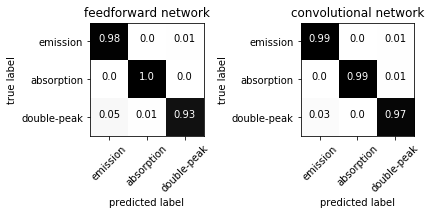

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2)

plot_confusion_matrix(dnn_cm, classes, ax1, title='feedforward network', normalize=True)
cax = plot_confusion_matrix(conv_cm, classes, ax2, title='convolutional network', normalize=True)

fig.tight_layout()